In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
#unique values for columns
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

age: 47 unique values
sex: 2 unique values
bmi: 548 unique values
children: 6 unique values
smoker: 2 unique values
region: 4 unique values
charges: 1337 unique values


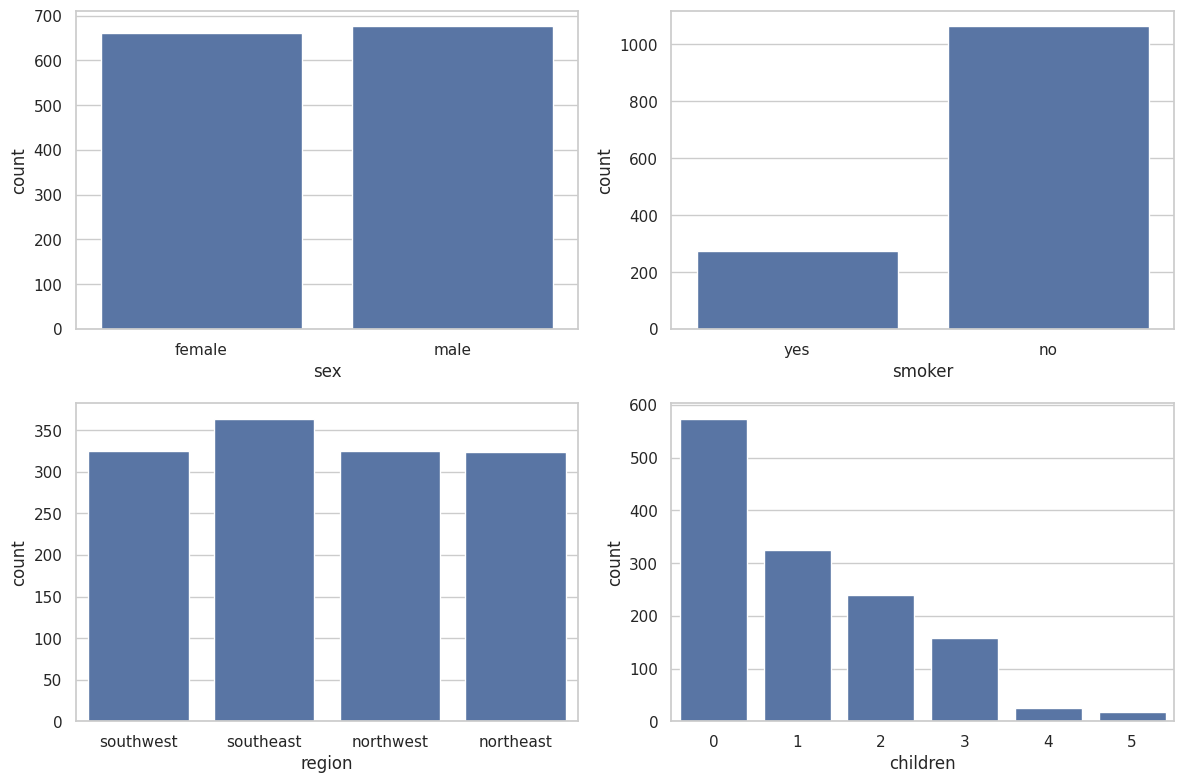

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(x='sex', data=df, ax=axes[0, 0])
sns.countplot(x='smoker', data=df, ax=axes[0, 1])
sns.countplot(x='region', data=df, ax=axes[1, 0])
sns.countplot(x='children', data=df, ax=axes[1, 1])
plt.tight_layout()

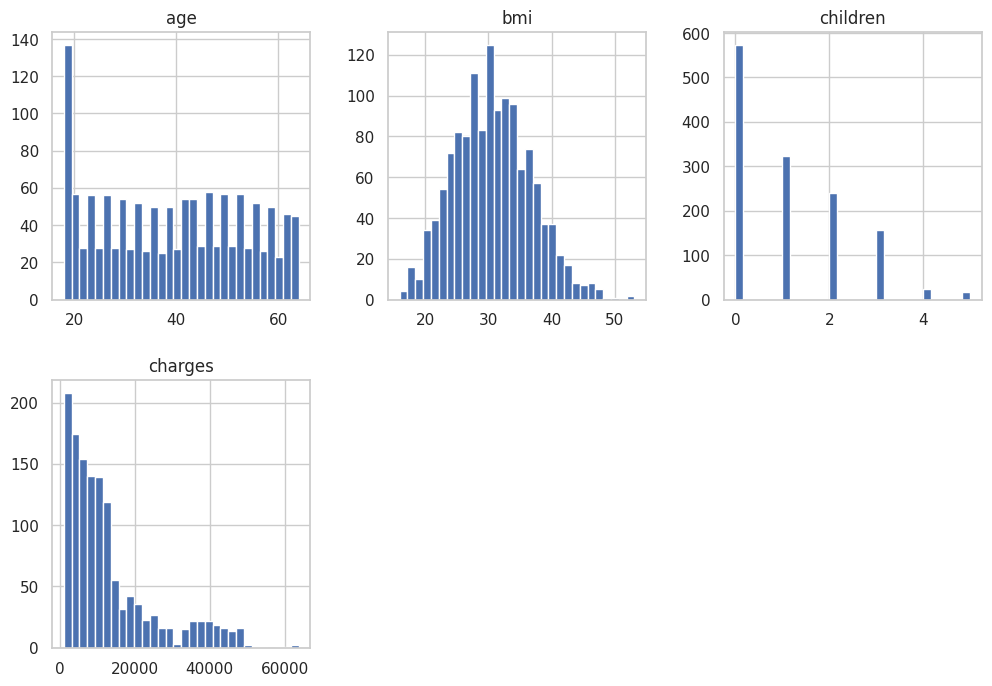

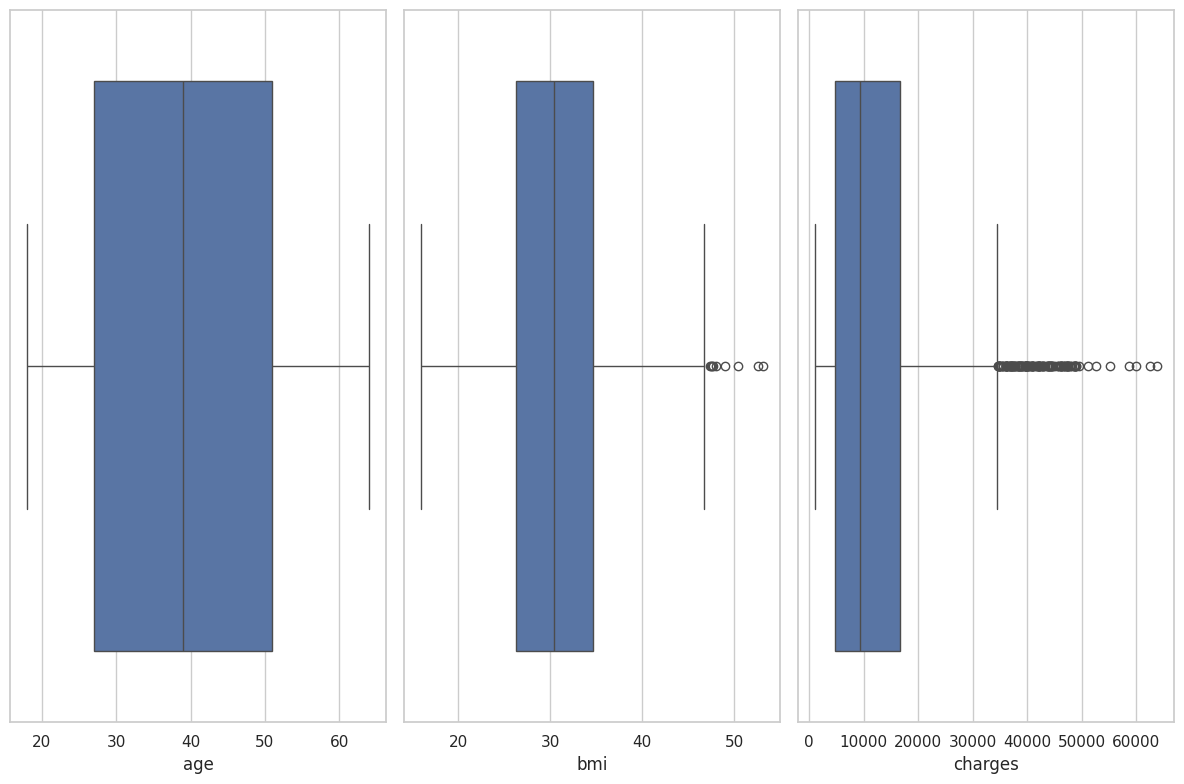

In [6]:
df.hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
sns.boxplot(x=df['age'], ax=axes[0])
sns.boxplot(x=df['bmi'], ax=axes[1])
sns.boxplot(x=df['charges'], ax=axes[2])
plt.tight_layout()

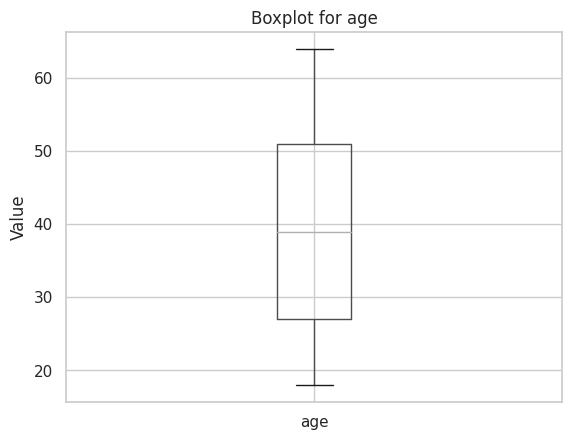

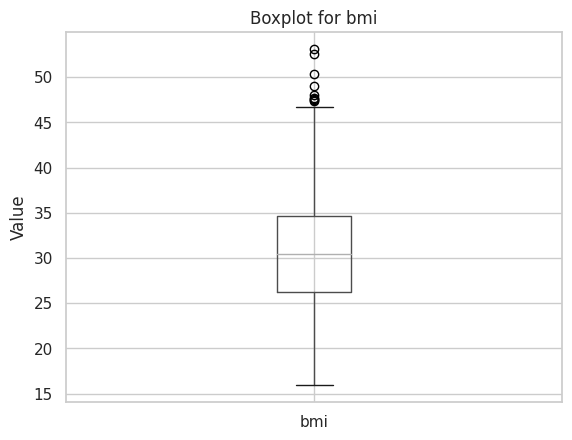

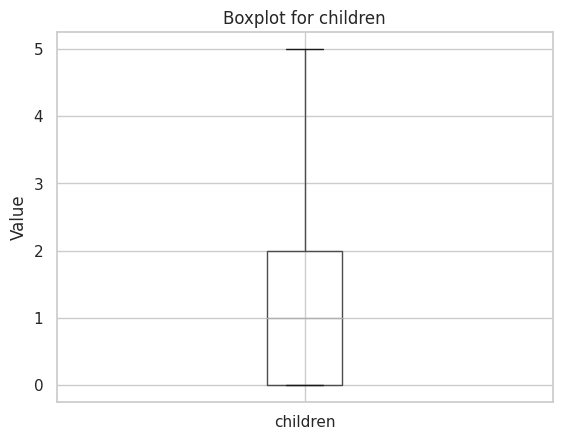

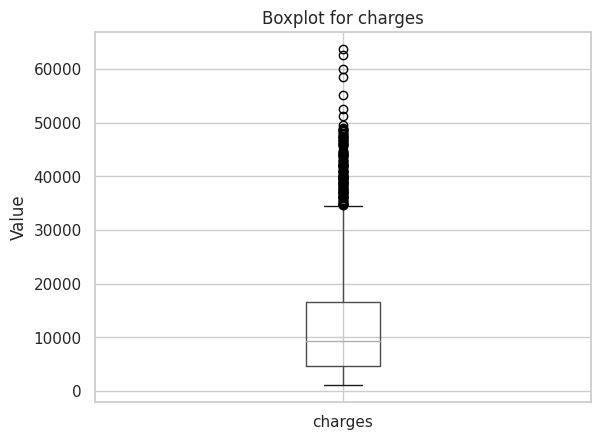

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through all columns
for column in df.columns:
    # Check if the data is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()  # Create a new figure for each plot
        df.boxplot(column)
        plt.title(f'Boxplot for {column}')
        plt.ylabel('Value')
        plt.show()


In [13]:
import pandas as pd

Q1 = df[['bmi', 'charges']].quantile(0.25)
Q3 = df[['bmi', 'charges']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df[['bmi', 'charges']] >= lower_bound) & (df[['bmi', 'charges']] <= upper_bound)]

filtered_df = df[((df[['bmi', 'charges']] >= lower_bound) & (df[['bmi', 'charges']] <= upper_bound)).all(axis=1)]


**Feature Encoding**

In [16]:
#sex
filtered_df["sex"] = np.where(filtered_df["sex"] == "female", '1', '2')
#smoker
filtered_df["smoker"] = np.where(filtered_df["smoker"] == "yes", '1', '0')
#region
conditions = [
    (filtered_df["region"] == "southwest"),
    (filtered_df["region"] == "southeast"),
    (filtered_df["region"] == "northwest"),
    (filtered_df["region"] == "northeast")
]

choices = ['1', '2', '3', '4']

filtered_df["region"] = np.select(conditions, choices)

filtered_df.head()

<ipython-input-16-7a0cde1bc32c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["sex"] = np.where(filtered_df["sex"] == "female", '1', '2')
<ipython-input-16-7a0cde1bc32c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["smoker"] = np.where(filtered_df["smoker"] == "yes", '1', '0')
<ipython-input-16-7a0cde1bc32c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,2,22.705,0,0,3,21984.47061
4,32,2,28.880,0,0,3,3866.85520


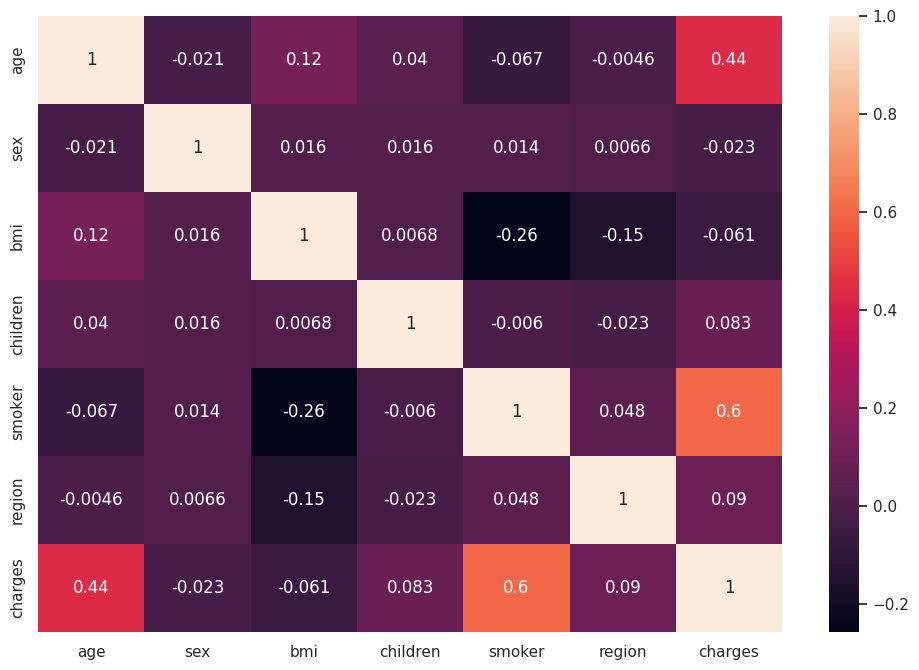

In [17]:
# correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

**Modelling**

In [19]:
#train-test split
X = filtered_df.drop('charges', axis=1)
y = filtered_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(alpha=0.1))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 17826578.766715698
R-squared: 0.6271592723266207


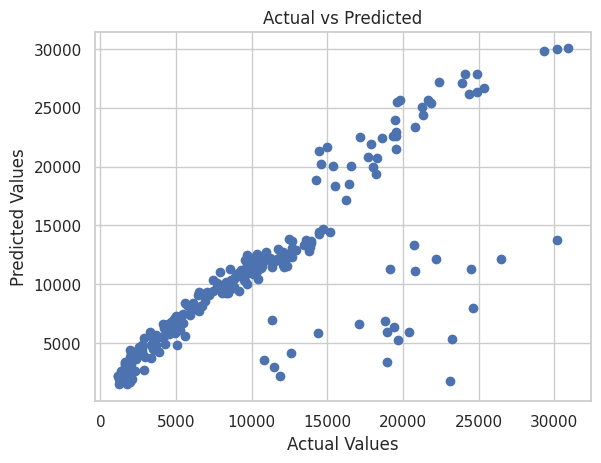

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
